## Angular Clustering in Five Bins - Baseline model


We consider Angular clustering, without cross correlations in five bins

Here we make some simplyfing assumptions

$\bullet$ We  assume that the bias is constant inside the bin: $b(z) \sim b^{i} = 1 + \bar{z}$.

$\bullet$ Furthermore we assume gaussian photo-z errors, described by one photo-z scatter and one photo-z bias parameter.

We leave free to very the cosmological parameters $\theta_c = [\Omega_{m}, \sigma_{8}]$and the the photo-z parameters ${\theta}_z = [\sigma_{z,0}, z_b]$.

We use as a statistic, the figure of merit between the two cosmological parameters FoM$_{\theta,c}$, but we may also consider the marginalized constraints on the individual cosmological parameters.

#### Overall Redshift Distribution

For simplicity we assume the same overall simple form for the normalazed redshift distribution of galaxies:

\begin{equation}
\frac{dn}{dz}(z) = \frac{\beta}{z_0^{1+ \alpha}\Gamma\left[\frac{1+\alpha}{\beta}\right]}z^\alpha \exp\left[- \left(\frac{z}{z_0}\right)^\beta \right].
\end{equation}

With $\alpha$ and $\beta$ parameters that describe the shape of the distribution and $z_0$ is related to the median redshift (which means, it has to do with the depth of the survey). 

If the total angular number density of galaxies is 
$\bar{n}^{\,tot}$, the angular number density in a bin $i$ is:

\begin{equation}
\bar{n}^i = \bar{n}^{\, tot}\times \left[\int_0^\infty \frac{dn}{dz}F_i(z) \,dz \right].
\end{equation}

After fitting to DES Y3 data for a flux limited sample ($i < 22$), we find the best fit parameters:

\begin{equation}
z_0 = 0.75, \quad \alpha = 1.0, \quad \beta = 3.43 
\end{equation}

Below I plot the overall redshift distribution, together with the (un-normalized) redshift distributions in five bins between $z = 0.2$ and $z=0.95$ (i.e. $ z \in [0.20-0.35], [0.35-0.50], [0.50-0.65], [0.65-0.80], [0.80-0.95]$).

In [1]:
# Import stuff
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate 
from code.plot_utils import plot_pretty
from matplotlib import rcParams
rcParams['font.family'] = 'serif' 
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Ang_clust_NO_cross import Full_Fisher as Fisher_NO 

Inputs of the function Fisher_NO (calculates Angular clustering in a given number of bins between given limits)

Fisher_NO(z_init, z_final, N_bins, sig_z, f_sky, N_gal_tot, z_0, a, b)

- z_init, z_final : redshift limits we consider

- N_bis: number of bins

- sig_z: photo-z scatter

- f_sky: fraction of the sky used

- N_gal_tot: total number of galaxies

- z_0, a, b : parameters that describe the distribution

In [3]:
# Import function that marginalizes over the the nuisance parameters
from Tools import marginalize as marg
# Import function that adds a constant prior of the form sigma(sigma_z) = sigma(z_b), same in every bin
from Tools import priors_1
# Import function that adds a constant prior of the form sigma(sigma_z) = sigma(z_b) = alpha*sigma_z, same in every bin
from Tools import priors_2
# Import function that calculates Figure of Merit
from Tools import FoM_return 

###### Make a plot of the redshift distribution and bins

In [4]:
from scipy.special import erf 

def W_z_clust(z, dz, z_i, z_f, sig_z):
    """
    Function that calculates the window function for 2D galaxy clustering
    -----------------
    Inputs:
    z: array of redshifts where we are going to calculate the window function
    dz: array of dz's - useful for the integral
    z_i : lower redshift limit of the bin
    z_f : upper redshift limit of the bin
    sig_z : photometric error
    ---------------
    Returns:
    The window function and its integral over all redshifts for a given bin with given limits
    
    """
    
    # Photometric window function
    x_min = (z - z_i)/(sig_z*np.sqrt(2.0)*(1.0+z))
    x_max = (z - z_f)/(sig_z*np.sqrt(2.0)*(1.0+z))
    F_z = 0.5*(erf(x_min) - erf(x_max))

    return F_z

from scipy.special import gamma

def dndz_fun(z_l, z_0, alpha, beta):
    prefact = beta/(z_0*gamma((alpha+1.0)/beta))
    dndz = prefact*((z_l/z_0)**alpha)*np.exp(-((z_l/z_0)**beta))
    return dndz


z = np.linspace(0.0, 2.0, 500)
dz = (z[2:]-z[:-2])/2.0
z = z[1:-1]

z_0 = 0.75
alpha = 1.0
beta = 3.43


sig_z = 0.04
dNdz = dndz_fun(z, z_0, alpha, beta)
F_1 = W_z_clust(z, dz, 0.20, 0.35, sig_z)
F_2 = W_z_clust(z, dz, 0.35, 0.50, sig_z)
F_3 = W_z_clust(z, dz, 0.50, 0.65, sig_z)
F_4 = W_z_clust(z, dz, 0.65, 0.80, sig_z)
F_5 = W_z_clust(z, dz, 0.80, 0.95, sig_z)

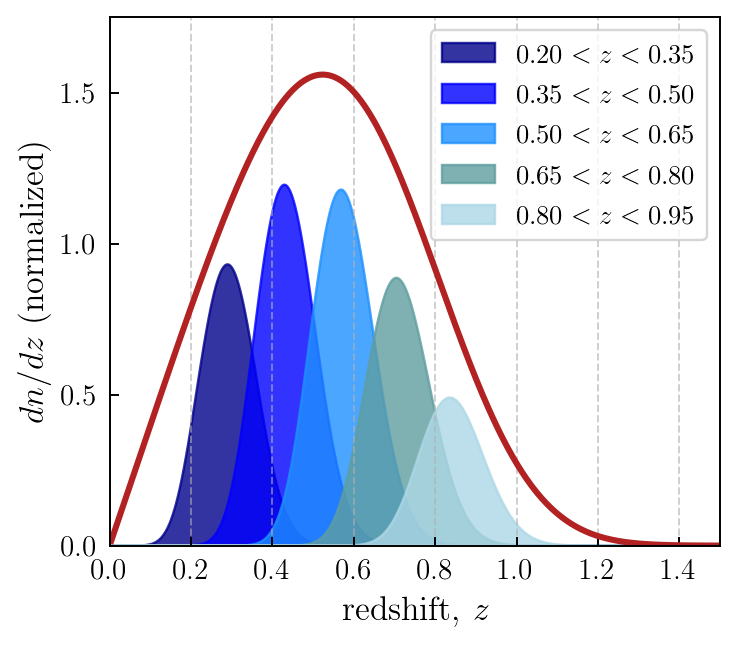

In [5]:
plot_pretty()
fig = plt.figure(figsize = (4.5,4))

plt.plot(z, dNdz, c='firebrick', linewidth=2.5)
plt.fill(z, dNdz*F_1, c='darkblue', alpha=0.8, label='$0.20<z<0.35$')
plt.fill(z, dNdz*F_2, c='blue', alpha=0.8, label ='$0.35<z<0.50$')
plt.fill(z, dNdz*F_3, c='dodgerblue', alpha=0.8, label='$0.50<z<0.65$')
plt.fill(z, dNdz*F_4, c='cadetblue', alpha=0.8, label='$0.65<z <0.80$')
plt.fill(z, dNdz*F_5, c='lightblue', alpha=0.8, label='$0.80<z <0.95$')



plt.grid(ls='--', axis='x' ,alpha=0.6)

plt.xlim(0.0,1.5)
plt.ylim(0.0,1.75)

plt.xlabel('redshift, $z$', fontsize=14); plt.ylabel('$dn/dz$ (normalized)', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4])
plt.yticks([0.0,0.5,1.0,1.5])

plt.legend(frameon=True, loc='upper right', fontsize=11)
plt.savefig('red_dist.pdf')
plt.show()

In the above figure we see the overall redshift distribution; I'm going to use this redshift distribution as the common redshift distribution for all the samples I'm going to consider. 

I also present the (un-normalized) redshift distributions in the five bins, for samples with $\sigma_{z,0} = 0.04$

#### Sample definition

As in the previous section, we describe each sample with the pair of parameters $(N_g, \sigma_{z,0})$. 

We assume a fiducial value $z_b = 0$ and Gaussian photo-z's for all samples. Although incorrect, for simplicity, we assume that all samples share the same redshift distribution.

We define two specific samples:

- A redMaGiC-like sample:  $\,N_g = 2.67 \times 10^6$, $\quad \sigma_{z,0} = 0.0166$.

- BAO-like sample: $\,N_g = 1.57 \times 10^7$, $\quad \sigma_{z,0} = 0.031$.

- A Flux-Limited like sample: $\,N_g = 5.73 \times 10^7 $, $\quad \sigma_{z,0} = 0.082$.

### Figure of Merit (FoM) plots

Let us start making Figure of Merit (FoM) contour plots (FoM as a function of sample size $N_g$ and photo-z error, $\sigma_{z,0}$).

First I consider the case where the photo-z error parameters ($z_b$ and $\sigma_{z,0}$) are held fixed in their fiducial values (in other words the priors are extremely conservative).

We use five, constant (the same for all samples, independently of the photo-z error value) redshift bins between $z = 0.20$ and $z = 0.95$.

We consider a range in sizes: $ N_g \in [ 10^6, 7 \times 10^7]$ and a range in photo-z errors $\sigma_{z,0} \in [0.01, 0.1]$.

I normalize everything to the FoM of the redMaGiC-like sample.

In [6]:
# Arrays of sample sizes and redshift errors 
# ======================================================
N_gal_arr = np.linspace(1.0e6, 7.0e7, 35)
sig_z_arr = np.linspace(0.01, 0.1, 35)
size = np.size(N_gal_arr)

In [7]:
# Survey parameters for the Fisher matrix 
# =====================================================
# =====================================================
z_init =  0.20 #Initial redshift
z_final = 0.95 #Final redshift
N_bins = 5 #Number of bins
f_sky = 4580.0/41253.0 # Fraction of the sky

# Parameters of the redshift distribution
z_0 = 0.75
a = 1.0
b = 3.43
# =====================================================
# =====================================================
# Parameters (size and redshift error for the particular samples I'm going to consider)

# redMaGiC-like sample
N_g_rm, sig_rm = 2.67e6, 0.0166
# BAO-cuts like sample
N_g_BAO, sig_BAO = 1.567e7, 0.031
# Flux-limited like sample
N_g_fl, sig_fl = 5.73e7, 0.082

#### Without redshift error priors

In [8]:
# Figure of Merit free photometric errors
#======================================================================
# Initialize matrix
FoM_free = np.zeros([size,size])


for i in range(size):
    sig_z = sig_z_arr[i]
    for j in range(size):
        N_gal = N_gal_arr[j]
        
        #Calculate the free Fisher matrix now 
        Fish_mat = Fisher_NO(z_init, z_final, N_bins, sig_z, f_sky, N_gal, z_0, a, b)
        
        #Calculate the Figure of Merit
        FoM_free[i][j] = FoM_return(Fish_mat)              

In [9]:
# Calculate the Figure of Merit of the redMaGiC-like, BAO-like and Flux limited-like 
# samples without priors
# ==================================================================================
# ==================================================================================

#redMaGiC-like sample
Fish_mat_rm_free = Fisher_NO(z_init, z_final, N_bins, sig_rm, f_sky, N_g_rm, z_0, a, b)
FoM_rm_free = FoM_return(Fish_mat_rm_free)
# BAO-like sample
Fish_mat_BAO_free = Fisher_NO(z_init, z_final, N_bins, sig_BAO, f_sky, N_g_BAO, z_0, a, b)
FoM_BAO_free = FoM_return(Fish_mat_BAO_free)
# Flux-limited-like sample
Fish_mat_fl_free = Fisher_NO(z_init, z_final, N_bins, sig_fl, f_sky, N_g_fl, z_0, a, b)
FoM_fl_free = FoM_return(Fish_mat_fl_free)

In [10]:
# Normalize the matrix now
# =================================================
FoM_free_tr = np.matrix.transpose(FoM_free)
FoM_free_norm = FoM_free_tr/(FoM_rm_free)

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth', 'linestyle'
  s)


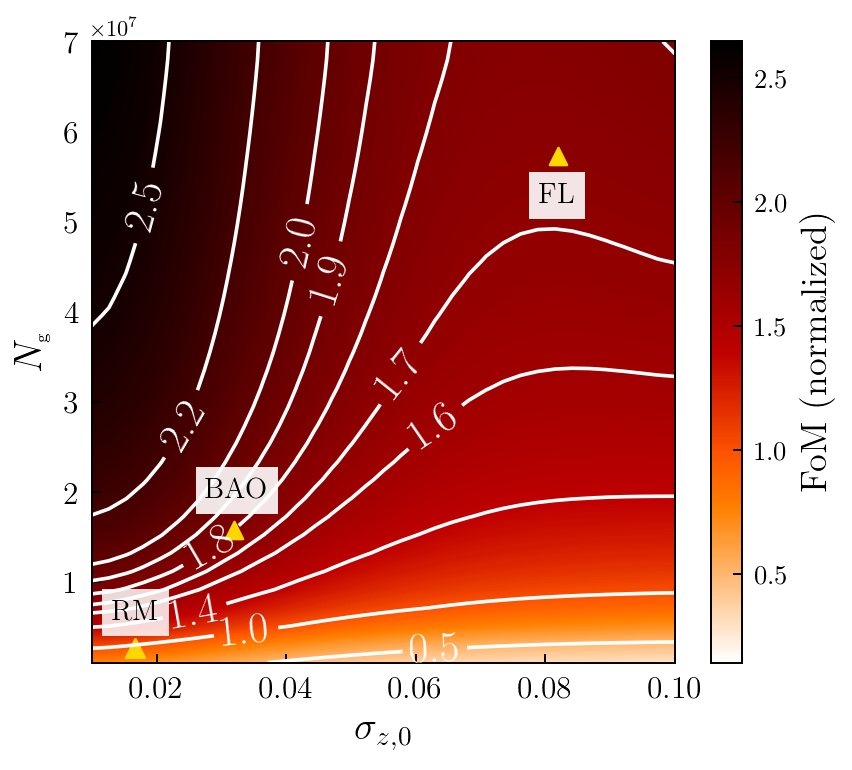

In [11]:
import scipy.ndimage
def FoM_free_return(a_1,a_2):
    FoMino = FoM_free_norm
    return FoMino
# =============================================================================
# =============================================================================
fig = plt.figure(figsize = (5.0,4.5))

a_1, a_2 = np.meshgrid(sig_z_arr,N_gal_arr )
FoM_free = FoM_free_return(a_1, a_2)

FoM_free = scipy.ndimage.gaussian_filter(FoM_free, 1)
levels = np.linspace(np.min(FoM_free_norm),np.max(FoM_free_norm),300)
image = plt.contourf(a_1, a_2, FoM_free , levels=levels, cmap=plt.cm.gist_heat_r)
#===============================================================================
#===============================================================================

C = plt.contour(a_1,a_2, FoM_free, [0.5,1.0,1.4,1.6,1.7,1.8, 1.9, 2.0,2.2,2.5] , colors=('w','w', 'w', 'w', 'w','w', 'w', 'w', 'w','w','w','w','w','w'),linestyle ='--',  linewidth=2.3)
plt.clabel(C, inline=1, fontsize=18, fmt='%1.1f', fontweight='heavy')

#plt.yscale('log')


plt.scatter(0.082,5.73e7, color='gold', s=50.0, marker='^')
plt.text(0.079, 5.20e7,'FL', color='black', fontsize=12,bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
plt.scatter(0.032,1.57e7, color='gold', s=50.0, marker='^')
plt.text(0.0275, 1.92e7,'BAO', color='black', fontsize=12,bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
plt.scatter(0.0166,2.67e6, color='gold', s=60.0, marker='^')
plt.text(0.0131, 5.7e6,'RM', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', alpha=0.85))
plt.tick_params(axis='both', labelsize=13)

plt.xlabel("$\sigma_{z,0}$", fontsize=16);plt.ylabel("$N_{\mbox{\scriptsize{g}}}$", fontsize=16)


plt.xlim(0.01,0.1);plt.ylim(1.0e6, 7.0e7)

cbar = plt.colorbar(image, orientation='vertical', ticks=[0.5,1.0,1.5,2.0,2.5])
cbar.set_label('FoM (normalized)', fontsize=15)
cbar.ax.set_yticklabels([0.5,1.0,1.5,2.0,2.5,3.0,3.5], fontsize=11)

plt.tight_layout()
plt.savefig('Baseline_free.pdf')
plt.show() 

Now, print:

- FoM of the RM sample. Since in most of our explorations we normalize everything w/r to this sample, it is good to know the absolute value of this sample to compare the relative magnitudes.

- Ratio of FoM of the flux limited sample to the RedMaGiC sample
- Ratio of FoM of the BAO-like sample to the RedMaGiC sample

In [12]:
print(FoM_rm_free)
print(FoM_fl_free/FoM_rm_free)
print(FoM_BAO_free/FoM_rm_free)
print(FoM_fl_free/FoM_BAO_free)

4757.91119238056
1.7332317077059933
1.8215672182302038
0.9515057640255322


#### Adding Priors

In the above exploration/plot we assumed no knowledge of the redshift uncertainties. In practice, external redshift calibration/validation provides priors on the redshift uncertainty parameters.

Here we will consider the effect of these uncertainties on the relative constraints from different samples, by including priors on the photo-z parameters.

Now, we make some simplifying assumptions:

- We assume the same photo-z prior on the scatter and bias parameters $\sigma(\sigma_{z,0}) = \sigma(\Delta_z)$.
- We assume that the photo-z prior is the same in all redshift bins $\sigma(\Delta_z^i) = \sigma(\Delta_z) = const$.

- To further simplify in our analysis, when plotting the FoM in the $\sigma_{z,0} - N_g$ space, we assume that $\sigma(\Delta_z) \propto \sigma_{z,0}$, with a common proportionality constant for all samples, $\alpha$. That way we incorporate the fact that samples with more accurate photo-zs have also more secure photo-zs.

- We pick and plot two cases of $\alpha$:
    - The "pessimistic/conservative" case, $\alpha = 0.4$.
    In that case, for the redMaGiC sample we have $\sigma(\Delta_z) \sim 0.0064$,
    and $\sigma(\Delta_z) \sim 0.032$. This case is closer to the case of DES Y1 priors (although it gives worse priors on the 
    
    - The "optimistic" case, $\alpha = 0.04$. This case gives for the redMaGiC sample $\sigma(\Delta_z) \sim 0.00064$ and $\sigma(\Delta_z) \sim 0.0032$ for the Flux Limited sample. This matches some forecasts for LSST (see 1607.01761) and also gives the correct order of magnitude of (very optimistic forectasts) for the priors on DES Y3 source sample (for the DES Y3 redMaGiC sample I don't know if there are forecasts for improvement of the priors).
    
Let's make two plots now, for the two cases described above.



In [13]:
# Figure of Merit conservative and optimistic prior on photometric errors
#======================================================================
# Initialize matrices
FoM_pr_con = np.zeros([size,size]) # Conservative prior case
FoM_pr_opt = np.zeros([size,size]) # Optimistic prior case
FoM_fixed = np.zeros([size, size])

# Define the optimistic and conservative alphas - see above
alpha_con = 0.4
alpha_opt = 0.04
# Define also an alpha that will actually result in fixed photo-z errors
# In other words, knowledge of the photo-zs with infinite accuracy
alpha_fix = 1.0e-10

for i in range(size):
    sig_z = sig_z_arr[i]
    for j in range(size):
        N_gal = N_gal_arr[j]
        
        #Calculate the free Fisher matrix 
        Fish_mat = Fisher_NO(z_init, z_final, N_bins, sig_z, f_sky, N_gal, z_0, a, b)
        
        # Add the priors now 
        # ------------------------------------------------------------
        Fish_pr_con = priors_2(Fish_mat, N_bins, alpha_con, sig_z) #conservative prior
        Fish_pr_opt = priors_2(Fish_mat,N_bins, alpha_opt, sig_z) #optimistic prior
        Fish_fix = priors_2(Fish_mat, N_bins, alpha_fix, sig_z) # Fixed photo-z parameters
        
        #Calculate the Figure of Merit
        FoM_pr_con[i][j] = FoM_return(Fish_pr_con)
        FoM_pr_opt[i][j] = FoM_return(Fish_pr_opt)
        FoM_fixed[i][j] = FoM_return(Fish_fix)

#### - I) Conservative case, $\alpha = 0.4$

In [14]:
# Calculate the FoM of the redMaGiC, BAO and Flux Limited samples in the 
# conservative priors case 

# redMaGiC sample
Fish_rm_con = priors_2(Fish_mat_rm_free, N_bins, alpha_con, sig_rm)
FoM_rm_con = FoM_return(Fish_rm_con)

# BAO sample
Fish_BAO_con = priors_2(Fish_mat_BAO_free, N_bins, alpha_con, sig_BAO)
FoM_BAO_con = FoM_return(Fish_BAO_con)

# Flux- limited sample
Fish_fl_con = priors_2(Fish_mat_fl_free, N_bins, alpha_con, sig_fl)
FoM_fl_con = FoM_return(Fish_fl_con)

In [15]:
# Normalize the matrix now
# =================================================
FoM_pr_con_tr = np.matrix.transpose(FoM_pr_con)
FoM_pr_con_norm = FoM_pr_con_tr/(FoM_rm_con)

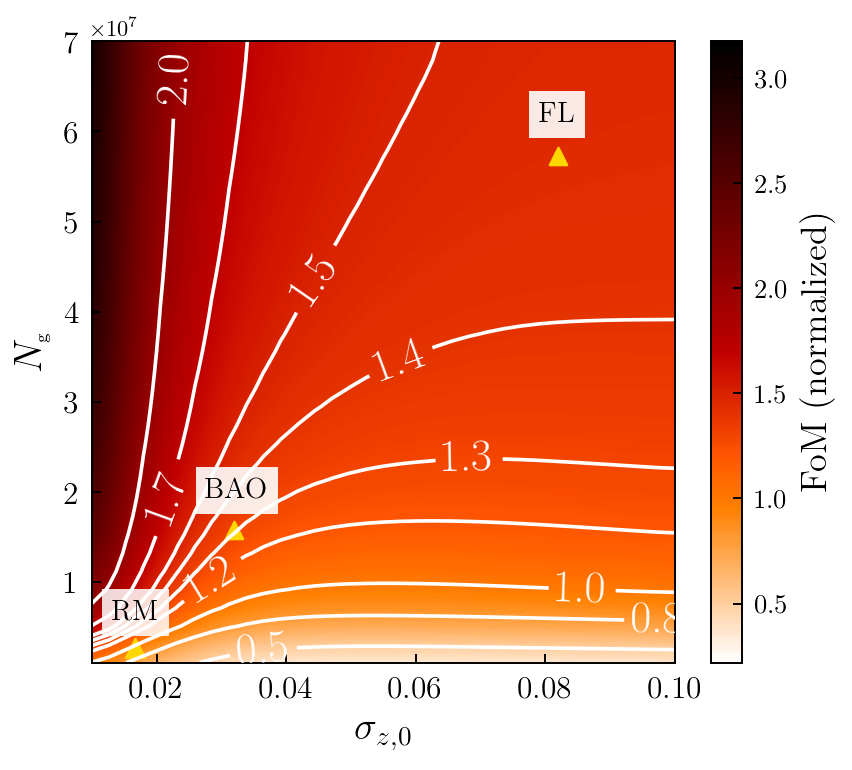

In [39]:
def FoM_pr_con_return(a_1,a_2):
    FoMino = np.copy(FoM_pr_con_norm)
    return FoMino
# =============================================================================
# =============================================================================
fig = plt.figure(figsize = (5.0,4.5))

a_1, a_2 = np.meshgrid(sig_z_arr,N_gal_arr )
FoM_pr_cons = np.copy(FoM_pr_con_return(a_1, a_2))

FoM_pr_cons = scipy.ndimage.gaussian_filter(FoM_pr_cons, 1)
levels = np.linspace(np.min(FoM_pr_con_norm),np.max(FoM_pr_con_norm),300)
image = plt.contourf(a_1, a_2, FoM_pr_cons , levels=levels, cmap=plt.cm.gist_heat_r)
#===============================================================================
#===============================================================================

C = plt.contour(a_1,a_2, FoM_pr_cons, [0.5,0.8,1.0,1.2,1.3,1.4,1.5,1.7,2.0] , colors=('w','w', 'w', 'w', 'w','w', 'w', 'w', 'w','w','w','w','w','w'),linestyle ='--',  linewidth=2.3)
plt.clabel(C, inline=1, fontsize=19, fmt='%1.1f', fontweight='heavy')

#plt.yscale('log')


plt.scatter(0.082,5.73e7, color='gold', s=50.0, marker='^')
plt.text(0.079, 6.10e7,'FL', color='black', fontsize=12,bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
plt.scatter(0.032,1.57e7, color='gold', s=50.0, marker='^')
plt.text(0.0275, 1.92e7,'BAO', color='black', fontsize=12,bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
plt.scatter(0.0166,2.67e6, color='gold', s=60.0, marker='^')
plt.text(0.0131, 5.7e6,'RM', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', alpha=0.85))
plt.tick_params(axis='both', labelsize=13)

plt.xlabel("$\sigma_{z,0}$", fontsize=16);plt.ylabel("$N_{\mbox{\scriptsize{g}}}$", fontsize=16)


plt.xlim(0.01,0.1);plt.ylim(1.0e6, 7.0e7)

cbar = plt.colorbar(image, orientation='vertical', ticks=[0.5,1.0,1.5,2.0,2.5,3.0,3.5])
cbar.set_label('FoM (normalized)', fontsize=15)
cbar.ax.set_yticklabels([0.5,1.0,1.5,2.0,2.5,3.0,3.5], fontsize=11)

plt.tight_layout()
plt.savefig('Cons_priors.pdf')
plt.show() 

In [17]:
print(FoM_rm_con)
print(FoM_fl_con/FoM_rm_con)
print(FoM_BAO_con/FoM_rm_con)
print(FoM_fl_con/FoM_BAO_con)

14386.273674874194
1.4524755857236347
1.3202868942572379
1.1001211873278216


In [18]:
print(FoM_rm_con/FoM_rm_free)

3.0236532573186183


#### - II) Optimistic case, $\alpha = 0.04$

In [19]:
# Calculate the FoM of the redMaGiC, BAO and Flux Limited samples in the 
# optimistic priors case 

# redMaGiC sample
Fish_rm_opt = priors_2(Fish_mat_rm_free, N_bins, alpha_opt, sig_rm)
FoM_rm_opt = FoM_return(Fish_rm_opt)

# BAO sample
Fish_BAO_opt = priors_2(Fish_mat_BAO_free, N_bins, alpha_opt, sig_BAO)
FoM_BAO_opt = FoM_return(Fish_BAO_opt)

# Flux- limited sample
Fish_fl_opt = priors_2(Fish_mat_fl_free, N_bins, alpha_opt, sig_fl)
FoM_fl_opt = FoM_return(Fish_fl_opt)

In [20]:
# Normalize the matrix now
# =================================================
FoM_pr_opt_tr = np.matrix.transpose(np.copy(FoM_pr_opt))
FoM_pr_opt_norm = np.copy(FoM_pr_opt_tr)/(FoM_rm_opt)

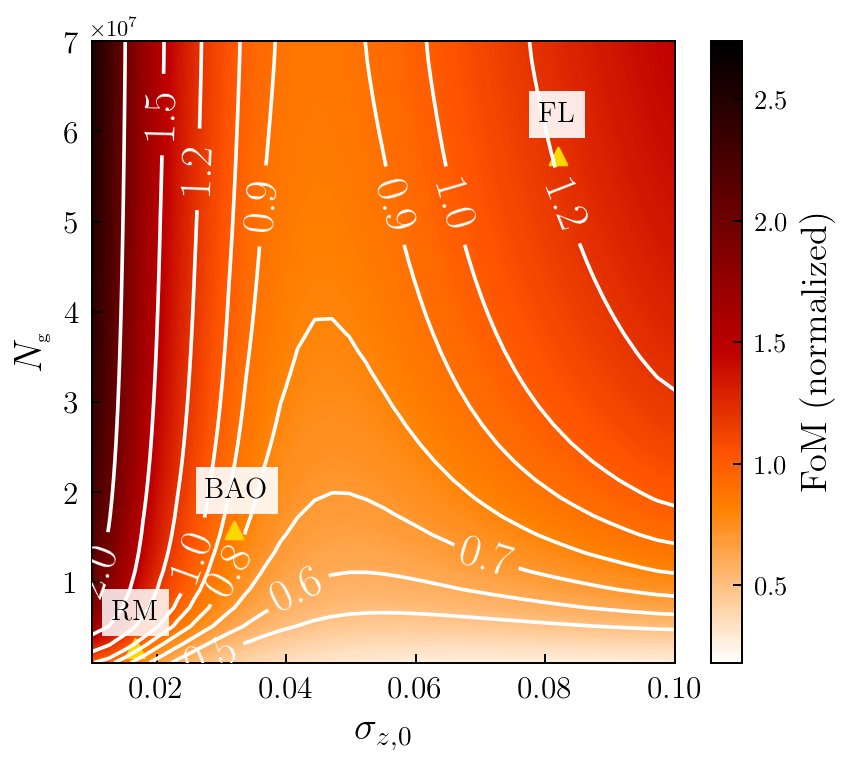

In [40]:
def FoM_pr_opt_return(a_1,a_2):
    FoMino = np.copy(FoM_pr_opt_norm)
    return FoMino
# =============================================================================
# =============================================================================
fig = plt.figure(figsize = (5.0,4.5))

a_1, a_2 = np.meshgrid(sig_z_arr,N_gal_arr )
FoM_pr_opt = np.copy(FoM_pr_opt_return(a_1, a_2))

FoM_pr_opt = scipy.ndimage.gaussian_filter(FoM_pr_opt, 1)
levels = np.linspace(np.min(FoM_pr_opt_norm),np.max(FoM_pr_opt_norm),300)
image = plt.contourf(a_1, a_2, FoM_pr_opt , levels=levels, cmap=plt.cm.gist_heat_r)
#===============================================================================
#===============================================================================

C = plt.contour(a_1,a_2, FoM_pr_opt, [0.5,0.6,0.7,0.8,0.9,1.0,1.2,1.5,2.0] , colors=('w','w', 'w', 'w', 'w','w', 'w', 'w', 'w','w','w','w','w','w'),linestyle ='--',  linewidth=2.4)
plt.clabel(C, inline=1, fontsize=19, fmt='%1.1f', fontweight='heavy')

#plt.yscale('log')


plt.scatter(0.082,5.73e7, color='gold', s=50.0, marker='^')
plt.text(0.079, 6.10e7,'FL', color='black', fontsize=12,bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
plt.scatter(0.032,1.57e7, color='gold', s=50.0, marker='^')
plt.text(0.0275, 1.92e7,'BAO', color='black', fontsize=12,bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
plt.scatter(0.0166,2.67e6, color='gold', s=60.0, marker='^')
plt.text(0.0131, 5.7e6,'RM', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', alpha=0.85))
plt.tick_params(axis='both', labelsize=13)

plt.xlabel("$\sigma_{z,0}$", fontsize=16);plt.ylabel("$N_{\mbox{\scriptsize{g}}}$", fontsize=16)


plt.xlim(0.01,0.1);plt.ylim(1.0e6, 7.0e7)

cbar = plt.colorbar(image, orientation='vertical', ticks=[0.5,1.0,1.5,2.0,2.5,3.0,3.5])
cbar.set_label('FoM (normalized)', fontsize=15)
cbar.ax.set_yticklabels([0.5,1.0,1.5,2.0,2.5,3.0,3.5], fontsize=11)

plt.tight_layout()
plt.savefig('optim_priors.pdf')
plt.show() 

In [22]:
print(FoM_rm_opt)
print(FoM_fl_opt/FoM_rm_opt)
print(FoM_BAO_opt/FoM_rm_opt)
print(FoM_fl_opt/FoM_BAO_opt)

52539.64046185439
1.2117516484173316
0.8613216273343387
1.4068515290478905


In [23]:
print(FoM_rm_opt/FoM_rm_con)

3.6520673559558046


#### - III) Fixed photo-z parameters case

In [24]:
# Calculate the FoM of the redMaGiC, BAO and Flux Limited samples in the 
# optimistic priors case 

# redMaGiC sample
Fish_rm_fix = priors_2(Fish_mat_rm_free, N_bins,alpha_fix, sig_rm)
FoM_rm_fix = FoM_return(Fish_rm_fix)

# BAO sample
Fish_BAO_fix = priors_2(Fish_mat_BAO_free, N_bins, alpha_fix, sig_BAO)
FoM_BAO_fix = FoM_return(Fish_BAO_fix)

# Flux- limited sample
Fish_fl_fix = priors_2(Fish_mat_fl_free, N_bins, alpha_fix, sig_fl)
FoM_fl_fix = FoM_return(Fish_fl_fix)

In [25]:
print(FoM_rm_fix)
print(FoM_fl_fix/FoM_rm_fix)
print(FoM_BAO_fix/FoM_rm_fix)
print(FoM_fl_fix/FoM_BAO_fix)

96509.3852136991
2.847906828109291
2.297307094094035
1.2396718033173488


In [26]:
print(FoM_rm_fix/FoM_rm_opt)

1.8368870507168447


In [27]:
# Normalize the matrix now
# =================================================
FoM_fixed_tr = np.matrix.transpose(np.copy(FoM_fixed))
FoM_fixed_norm = np.copy(FoM_fixed_tr)/(FoM_rm_fix)

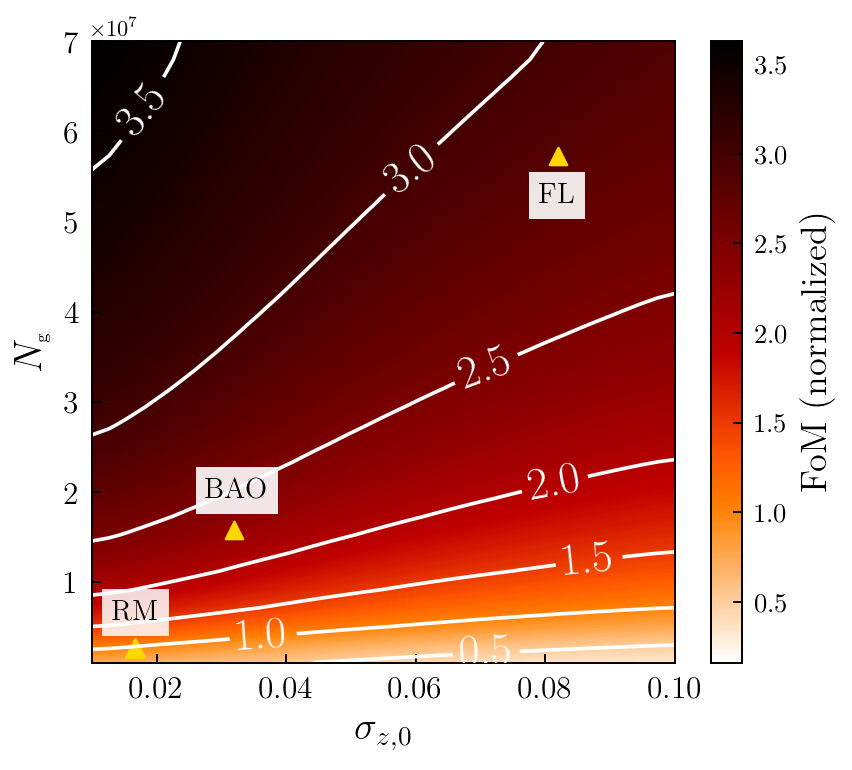

In [28]:
def FoM_fix_return(a_1,a_2):
    FoMino = np.copy(FoM_fixed_norm)
    return FoMino
# =============================================================================
# =============================================================================
fig = plt.figure(figsize = (5.0,4.5))

a_1, a_2 = np.meshgrid(sig_z_arr,N_gal_arr )
FoM_fix_pr = np.copy(FoM_fix_return(a_1, a_2))

FoM_fix_pr = scipy.ndimage.gaussian_filter(FoM_fix_pr, 1)
levels = np.linspace(np.min(FoM_fixed_norm),np.max(FoM_fixed_norm),300)
image = plt.contourf(a_1, a_2, FoM_fix_pr , levels=levels, cmap=plt.cm.gist_heat_r)
#===============================================================================
#===============================================================================

C = plt.contour(a_1,a_2, FoM_fix_pr, [0.5,1.0,1.5,2.0,2.5,3.0,3.5] , colors=('w','w', 'w', 'w', 'w','w', 'w', 'w', 'w','w','w','w','w','w'),linestyle ='--',  linewidth=2.4)
plt.clabel(C, inline=1, fontsize=19, fmt='%1.1f', fontweight='heavy')

#plt.yscale('log')


plt.scatter(0.082,5.73e7, color='gold', s=50.0, marker='^')
plt.text(0.079, 5.20e7,'FL', color='black', fontsize=12,bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
plt.scatter(0.032,1.57e7, color='gold', s=50.0, marker='^')
plt.text(0.0275, 1.92e7,'BAO', color='black', fontsize=12,bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
plt.scatter(0.0166,2.67e6, color='gold', s=60.0, marker='^')
plt.text(0.0131, 5.7e6,'RM', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='none', alpha=0.85))
plt.tick_params(axis='both', labelsize=13)

plt.xlabel("$\sigma_{z,0}$", fontsize=16);plt.ylabel("$N_{\mbox{\scriptsize{g}}}$", fontsize=16)


plt.xlim(0.01,0.1);plt.ylim(1.0e6, 7.0e7)

cbar = plt.colorbar(image, orientation='vertical', ticks=[0.5,1.0,1.5,2.0,2.5,3.0,3.5])
cbar.set_label('FoM (normalized)', fontsize=15)
cbar.ax.set_yticklabels([0.5,1.0,1.5,2.0,2.5,3.0,3.5], fontsize=11)

plt.tight_layout()
plt.savefig('fixed_phot.pdf')
plt.show() 

### Further exploration on the redshift error priors

We saw above that both the absolute value and the relative constraints depend on the 

Here I further explore the dependence of the constraints on the redshift priors.
For the prior range I adopt:

\begin{equation}
r \equiv \frac{\sigma(\sigma_{z,0})}{\sigma_{z,0}} = \frac{\sigma(\Delta_z)}{\sigma_{z,0}}\in [10^{-3},10^0]
\end{equation}

I plot the figures of merit as:

\begin{equation}
\frac{\mbox{FoM}}{\mbox{FoM}_{RM,fix}},
\end{equation}

I.e. I normalize everything according to the fixed photo-z's redMaGiC sample.

We select four samples:

- redMaGiC: $N_g = 2.67 \times 10^6, \quad \sigma_{z,0} = 0.0166$
- BAO-like: $N_g = 1.57 \times 10^7, \quad \sigma_{z,0} = 0.031$
- An indermediate: $N_g = 3.00 \times 10^7, \quad \sigma_{z,0} = 0.05 $
- Flux-limited: $N_g = 5.73 \times 10^7, \quad \sigma_{z,0} = 0.082$.

In [29]:
# Define again the samples - N_g and \sigma_{z,0}
# =============================================
# redMaGiC-like sample
N_g_rm, sig_rm = 2.67e6, 0.0166
# BAO-cuts like sample
N_g_BAO, sig_BAO = 1.567e7, 0.031
# Intermediate sample
N_g_int, sig_int = 3.0e7, 0.05
# Flux-limited like sample
N_g_fl, sig_fl = 5.73e7, 0.082

#==================================================================
# Define the array in alpha
alpha_lin = np.linspace(-3.0,0.0,300)
alpha = 10.0**alpha_lin


In [30]:
# Calculate the free fisher matrices in the above cases - i.e. without any priors
Fish_rm_free = Fisher_NO(z_init, z_final, N_bins, sig_rm, f_sky, N_g_rm, z_0, a, b)
Fish_BAO_free = Fisher_NO(z_init, z_final, N_bins, sig_BAO, f_sky, N_g_BAO, z_0, a, b)
Fish_int_free = Fisher_NO(z_init, z_final, N_bins, sig_int, f_sky, N_g_int, z_0, a, b)
Fish_fl_free = Fisher_NO(z_init, z_final, N_bins, sig_fl, f_sky, N_g_fl, z_0, a, b)

In [31]:
# The figures of merit will be arrays as well - initialize them
FoM_rm = np.zeros(len(alpha))
FoM_BAO = np.zeros(len(alpha))
FoM_int = np.zeros(len(alpha))
FoM_fl = np.zeros(len(alpha))

# Populate the arrays now
for i in range(len(alpha)):
    Fisher_rm = np.copy(Fish_rm_free)
    Fisher_BAO = np.copy(Fish_BAO_free)
    Fisher_int = np.copy(Fish_int_free)
    Fisher_fl = np.copy(Fish_fl_free)
    
    # Add the priors now
    alpha_pr = alpha[i]
    
    Fish_rm_pr = priors_2(Fisher_rm, N_bins, alpha_pr, sig_rm)
    Fish_BAO_pr = priors_2(Fisher_BAO, N_bins, alpha_pr, sig_BAO)
    Fish_int_pr = priors_2(Fisher_int, N_bins, alpha_pr, sig_int)
    Fish_fl_pr = priors_2(Fisher_fl, N_bins, alpha_pr, sig_fl)
    
    # Calculate FoM - populate the i-th element of the array
    FoM_rm[i] = FoM_return(Fish_rm_pr)
    FoM_BAO[i] = FoM_return(Fish_BAO_pr)
    FoM_int[i] = FoM_return(Fish_int_pr)
    FoM_fl[i] = FoM_return(Fish_fl_pr)
    
# ===========================================================================
# ===========================================================================
# Normalize to the maximum FoM of the redMaGiC sample
FoM_rm_norm = FoM_rm/FoM_rm_fix
FoM_BAO_norm = FoM_BAO/FoM_rm_fix
FoM_int_norm = FoM_int/FoM_rm_fix
FoM_fl_norm = FoM_fl/FoM_rm_fix

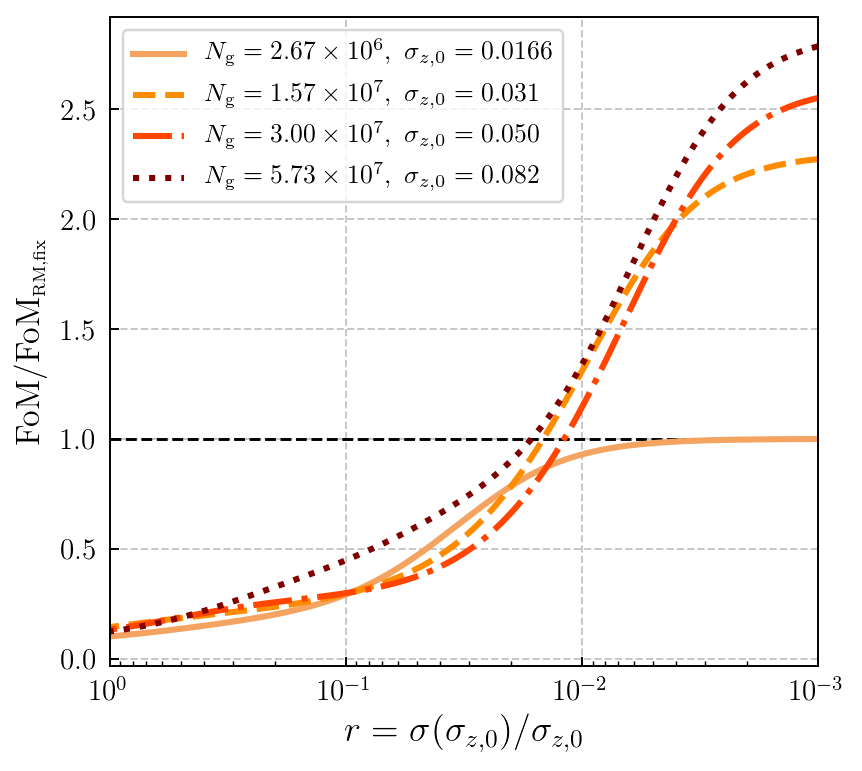

In [32]:
# Let's plot now
fig = plt.figure(figsize = (5.0,4.5))

plt.plot(alpha, FoM_rm_norm, linewidth=2.5, c='sandybrown', label=r'$N_{\mbox{\scriptsize{g}}}=2.67 \times 10^6, \,\, \sigma_{z,0} = 0.0166$')
plt.plot(alpha, FoM_BAO_norm, linewidth=2.5, c='darkorange',ls='--', label=r'$N_{\mbox{\scriptsize{g}}}=1.57 \times 10^7, \,\, \sigma_{z,0} = 0.031$')
plt.plot(alpha, FoM_int_norm, linewidth=2.5, c='orangered', ls='-.', label=r'$N_{\mbox{\scriptsize{g}}}=3.00 \times 10^7, \,\, \sigma_{z,0} = 0.050$')
plt.plot(alpha, FoM_fl_norm, linewidth=2.5, c='maroon', ls=':', label=r'$N_{\mbox{\scriptsize{g}}}= 5.73 \times 10^7, \,\, \sigma_{z,0} = 0.082$')


plt.hlines(1.0,1,1e-3, color='k', linestyle='--', linewidth= 1.2)

plt.ylabel('FoM/FoM$_{\scriptsize{\mbox{RM,fix}}}$',fontsize=14)
plt.xlabel(r'$r = \sigma(\sigma_{z,0})/\sigma_{z,0}$',fontsize=15)
plt.tick_params(axis='both', labelsize=12)


plt.grid(ls='--', alpha=0.7)

plt.legend(frameon=True, loc='upper left', fontsize=10.6)


plt.xscale('log');plt.xlim(1.0,1e-3)

plt.tight_layout()

plt.savefig('FoM_priors_1.pdf')
plt.show()

##### Samples close to the redMaGiC sample

Now I consider samples that are extensions to the redMaGiC samples:

- redMaGiC sample: $N_g = 2.67 \times 10^6, \quad \sigma_{z,0} = 0.0166$
- Sample 1 : $N_g = 4.00 \times 10^6, \quad \sigma_{z,0} = 0.021$
- Sample 2 : $N_g = 5.50 \times 10^6, \quad \sigma_{z,0} = 0.023$
- Sample 3 : $N_g = 7.00 \times 10^6, \quad \sigma_{z,0} = 0.025$

In [33]:
# Define the extra samples
N_g_1, sig_1 = 4.0e6, 0.021
N_g_2, sig_2 = 5.50e6, 0.023
N_g_3, sig_3 = 7.0e6, 0.025

# Calculate the Fisher matrices for the three samples
Fish_1_free = Fisher_NO(z_init, z_final, N_bins, sig_1, f_sky, N_g_1, z_0, a, b)
Fish_2_free = Fisher_NO(z_init, z_final, N_bins, sig_2, f_sky, N_g_2, z_0, a, b)
Fish_3_free = Fisher_NO(z_init, z_final, N_bins, sig_3, f_sky, N_g_3, z_0, a, b)

In [34]:
# The figures of merit will be arrays as well - initialize them
FoM_1 = np.zeros(len(alpha))
FoM_2 = np.zeros(len(alpha))
FoM_3 = np.zeros(len(alpha))

# Populate the arrays now
for i in range(len(alpha)):
    Fisher_1 = np.copy(Fish_1_free)
    Fisher_2 = np.copy(Fish_2_free)
    Fisher_3 = np.copy(Fish_3_free)
    
    # Add the priors now
    alpha_pr = alpha[i]
    
    Fish_1_pr = priors_2(Fisher_BAO, N_bins, alpha_pr, sig_1)
    Fish_2_pr = priors_2(Fisher_int, N_bins, alpha_pr, sig_2)
    Fish_3_pr = priors_2(Fisher_fl, N_bins, alpha_pr, sig_3)
    
    # Calculate FoM - populate the i-th element of the array

    FoM_1[i] = FoM_return(Fish_1_pr)
    FoM_2[i] = FoM_return(Fish_2_pr)
    FoM_3[i] = FoM_return(Fish_3_pr)
    
# ===========================================================================
# ===========================================================================
# Normalize to the maximum FoM of the redMaGiC sample
FoM_1_norm = FoM_1/FoM_rm_fix
FoM_2_norm = FoM_2/FoM_rm_fix
FoM_3_norm = FoM_3/FoM_rm_fix

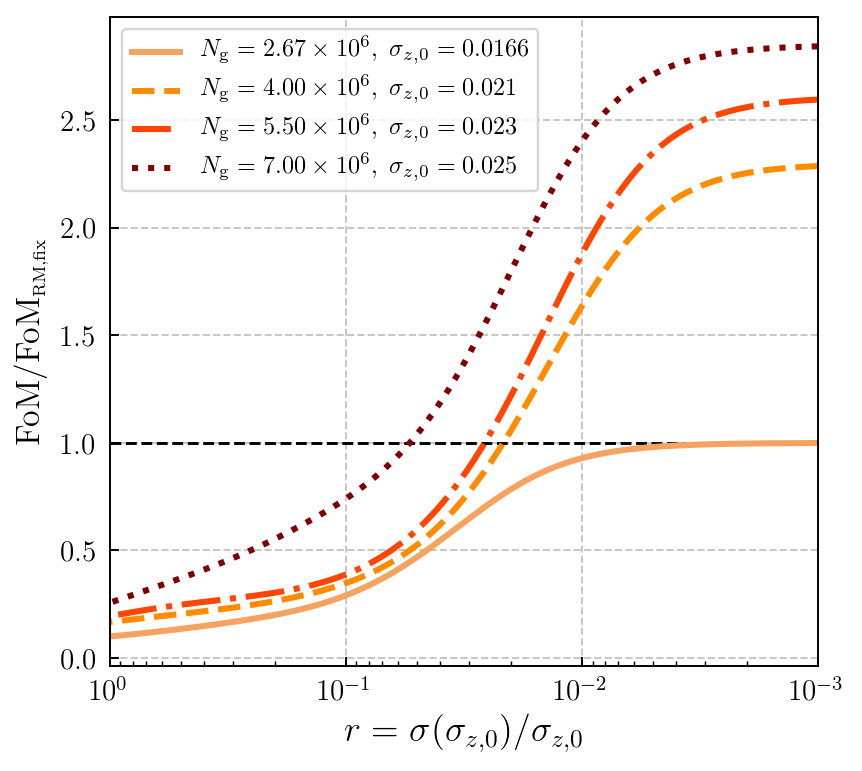

In [35]:
# Let's plot now
fig = plt.figure(figsize = (5.0,4.5))

plt.plot(alpha, FoM_rm_norm, linewidth=2.5, c='sandybrown', label=r'$N_{\mbox{\scriptsize{g}}}=2.67 \times 10^6, \,\, \sigma_{z,0} = 0.0166$')
plt.plot(alpha, FoM_1_norm, linewidth=2.5, c='darkorange',ls='--', label=r'$N_{\mbox{\scriptsize{g}}}= 4.00 \times 10^6, \,\, \sigma_{z,0} = 0.021$')
plt.plot(alpha, FoM_2_norm, linewidth=2.5, c='orangered', ls='-.', label=r'$N_{\mbox{\scriptsize{g}}}= 5.50 \times 10^6, \,\, \sigma_{z,0} = 0.023$')
plt.plot(alpha, FoM_3_norm, linewidth=2.5, c='maroon', ls=':', label=r'$N_{\mbox{\scriptsize{g}}}= 7.00 \times 10^6, \,\, \sigma_{z,0} = 0.025$')


plt.hlines(1.0,1,1e-3, color='k', linestyle='--', linewidth= 1.2)

plt.ylabel('FoM/FoM$_{\scriptsize{\mbox{RM,fix}}}$',fontsize=14)
plt.xlabel(r'$r = \sigma(\sigma_{z,0})/\sigma_{z,0}$',fontsize=15)
plt.tick_params(axis='both', labelsize=12)


plt.grid(ls='--', alpha=0.7)

plt.legend(frameon=True, loc='upper left', fontsize=10.0)


plt.xscale('log');plt.xlim(1.0,1e-3)

plt.tight_layout()

plt.savefig('FoM_priors_2.pdf')
plt.show()